In [ ]:
import numpy as np
import scipy 
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import matplotlib; matplotlib.use('Qt4Agg')
import matplotlib.pylab as plt
import time
from math import sinh

In [ ]:
LNWDT=5; FNT=15
#plt.rcParams['lines.linewidth'] = LNWDT; plt.rcParams['font.size'] = FNT

1) Laje retangular 2x1, simplesmente apoiada nos quatro lados


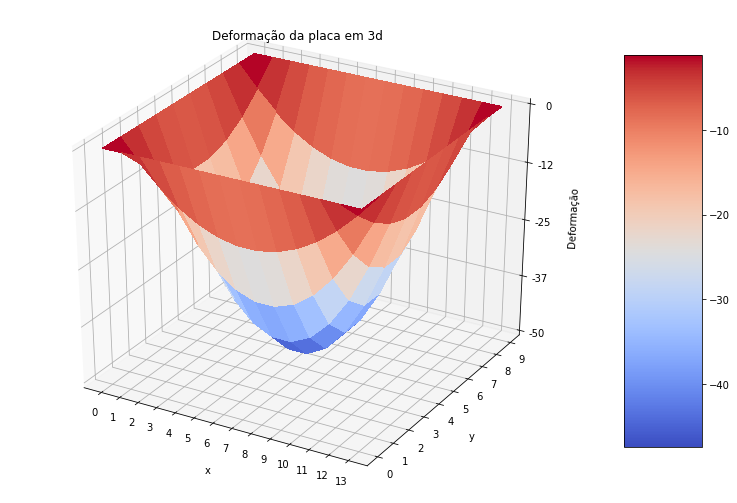

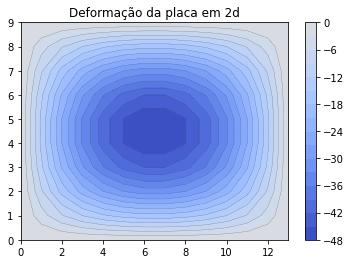



2) Laje retangular 2x1, “engastada” nos quatro lados


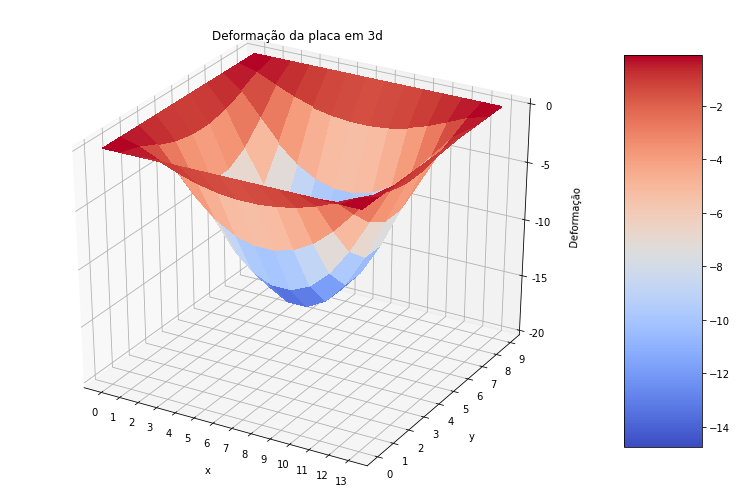

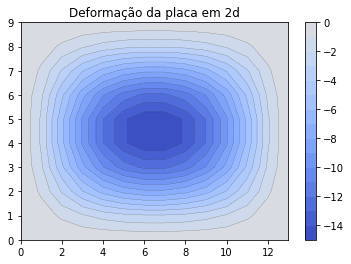

In [ ]:
# definindo os parametros da simulacao
n = 96   #matriz 96x96
d = np.ones(n) # diagonais
b = np.ones(n)*-1 #carga vertical P unitaria (negativa considerando deformaçao para baixo)
d0 = d*20  #diagonal principal (0)                                                           
d1 = d[0:-1]*-8  #diagonal 1 (peso -8)                                       
d2 = d[0:-2]*1  #diagonal 2 (peso 1) 
d11 = d[0:-11]*2  #diagonal 11 (peso 2) 
d13 = d[0:-13]*2  #diagonal 13 (peso 2) 
d12 = d[0:-12]*-8     #diagonal 12 (peso -8) 
d24 = d[0:-24]*1     #diagonal 24 (peso 1) 

#alterando as diagonais
#diagonal 0
d0[0] = 18
for k in range (1,11):
  d0[k] = 19
d0[11] = 18
d0[12] = 19
d0[23] = 19
d0[24] = 19
d0[35] = 19
d0[36] = 19
d0[47] = 19
for k in range (0,48):
  d0[95-k] = d0[k]

#diagonal 1
for k in range (1,8):
  d1[(12*k)-1] = 0

#diagonal 2
for k in range (1,8):
  d2[(12*k)-2] = 0
  d2[(12*k)-1] = 0

#diagonal 11
for k in range (0,8):
  d11[12*k] = 0

#diagonal 13
for k in range (1,7):
  d13[(12*k)-1] = 0

A = scipy.sparse.diags([d0, d1, d1, d2, d2, d11, d11, d12, d12, d13, d13, d24, d24], [0, 1, -1, 2, -2, 11, -11, 12, -12, 13, -13, 24, -24], format='csc') #matriz esparsa composta pelas diagonais criadas

tic=time.time()
w = scipy.sparse.linalg.spsolve(A,b) #w=sc.linalg.solve_triangular(A,d) (solucao da matriz 96x96)
toc=time.time()

# surfaceplot:
x = np.linspace(0, 13, 14)
y = np.linspace(0, 9, 10)

X, Y = np.meshgrid(x, y)

wt = np.zeros_like(X) 

#adicionando os pontos de borda de deformacao 0
for n in range(1,13):
  for k in range(1,9):
    wt[k,n] = w[n-1+((k-1)*12)]


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize = (13,9))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, wt, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-50, 0)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xlabel('\n\nx')
ax.set_ylabel('\n\ny')
ax.set_zlabel('\n\nDeformação ')
ax.set_xticks(x)
ax.set_yticks(y)

print('1) Laje retangular 2x1, simplesmente apoiada nos quatro lados')
fig.colorbar(surf, shrink=0.8, aspect=5)
plt.title('Deformação da placa em 3d')
plt.show()

print('')
print('')

CS = plt.contour(x, y, wt, 15, linewidths=0.2, colors='k')
CS = plt.contourf(x, y, wt, 15,
                  cmap=cm.coolwarm,vmax=abs(wt).max(), vmin=-abs(wt).max())
plt.title('Deformação da placa em 2d')
fig.colorbar(surf, shrink=1, aspect=5)
plt.colorbar()
plt.show()

#alterando a diagonal principal para laje engastada
#diagonal 0
d0[0] = 22
for k in range (1,11):
  d0[k] = 21
d0[11] = 22
d0[12] = 21
d0[23] = 21
d0[24] = 21
d0[35] = 21
d0[36] = 21
d0[47] = 21
for k in range (0,48):
  d0[95-k] = d0[k]


A = scipy.sparse.diags([d0, d1, d1, d2, d2, d11, d11, d12, d12, d13, d13, d24, d24], [0, 1, -1, 2, -2, 11, -11, 12, -12, 13, -13, 24, -24], format='csc')

tic=time.time()
w = scipy.sparse.linalg.spsolve(A,b) #w=sc.linalg.solve_triangular(A,d) (solucao da matriz 96x96)
toc=time.time()
 
#adicionando os pontos de borda de deformacao 0
for n in range(1,13):
  for k in range(1,9):
    wt[k,n] = w[n-1+((k-1)*12)]

fig = plt.figure(figsize = (13,9))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, wt, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-20, 0)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xlabel('\n\nx')
ax.set_ylabel('\n\ny')
ax.set_zlabel('\n\nDeformação')
ax.set_xticks(x)
ax.set_yticks(y)

print('')
print('')

print('2) Laje retangular 2x1, “engastada” nos quatro lados')
fig.colorbar(surf, shrink=0.8, aspect=5)
plt.title('Deformação da placa em 3d')
plt.show()

print('')
print('')

P2D = plt.contour(x, y, wt, 15, linewidths=0.2, colors='k')
P2D = plt.contourf(x, y, wt, 15,
                  cmap=cm.coolwarm,vmax=abs(wt).max(), vmin=-abs(wt).max())
plt.title('Deformação da placa em 2d')
fig.colorbar(surf, shrink=1, aspect=5)
plt.colorbar()
plt.show()
